day            False
month          False
year           False
Temperature    False
RH             False
 Ws            False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
Classes        False
dtype: bool

No missing values in the DataFrame.
df      day  month  year  Temperature  RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77   16    0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ...    ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54   11    0.0  82.0  6.0  16.3  2.5  6.2   
118   

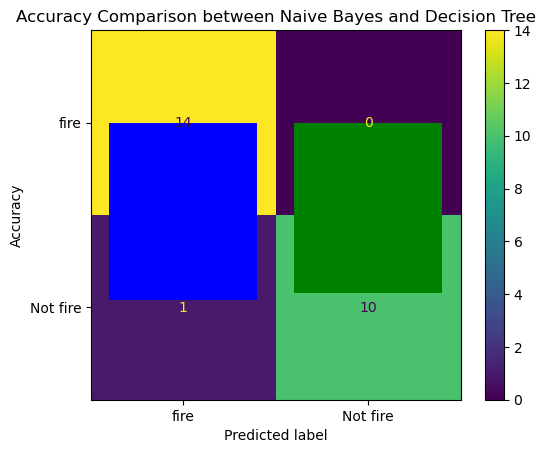

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df =pd.read_csv('Algerian11.csv');

class_mapping = {'fire': 1, 'not fire': 0}
# Apply mapping to the 'label' column
df['Classes'] = df['Classes'].map(class_mapping)

print (df.isnull().any())
print()
#mising values
if df.isnull().any().any():
    
    df = df.dropna()
    print("Rows with missing values have been dropped.")
else:
    print("No missing values in the DataFrame.")


X = df.drop(['Classes'], axis=1)

print('df',df)
y=df.Classes  


print("X ( features):")
print(X)

print("\ny (label):")
print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)

labels = ["fire", "Not fire"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

print()

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
# print the accuracy and the F1 Score
print("Accuracy:", accuray)
print("F1 Score:", f1)

#grid search
from sklearn.model_selection import GridSearchCV
clf = GaussianNB()

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

# Define the grid of parameter values for the grid search
grid_values = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring='recall')
grid_clf_acc.fit(X_train, y_train)

# Display the best parameters found by the grid search
print("Best Parameters: ", grid_clf_acc.best_params_)

clf = DecisionTreeClassifier()
grid_values = {
    'max_depth': [None, 5, 10, 15, 20],  # Adjust the maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Create a grid search object with recall as the scoring metric
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring='recall')
grid_clf_acc.fit(X_train, y_train)
print("Best Parameters: ", grid_clf_acc.best_params_)
# Train Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(nb_pred, y_test)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(dt_pred, y_test)

# Plotting the results
labels = ['Gaussian Naive Bayes', 'Decision Tree']
accuracies = [nb_accuracy, dt_accuracy]
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Naive Bayes and Decision Tree')
plt.show()

